# 预备知识

## 数据操作

In [1]:
import torch

In [2]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
x.shape

torch.Size([12])

In [4]:
x.numel()

12

In [5]:
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [6]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [7]:
torch.randn((3, 4))

tensor([[ 0.6088,  0.4457, -0.8907, -1.5910],
        [-0.3201, -2.1335, -0.2860,  1.0029],
        [ 1.7034, -0.4676, -0.7831,  0.3149]])

In [8]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [9]:
# 张量的+,-,*,/转换为按元素的操作
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x+y, x-y, x*y, x/y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]))

In [10]:
x ** y

tensor([ 1.,  4., 16., 64.])

In [11]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [12]:
# 张量进行连接， dim=0表示张良德第一个元素，dim = 1 表示张量的第二个元素
X = torch.arange(12, dtype=torch.float16).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [13]:
torch.concat((X, Y), dim=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

In [14]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [15]:
X.sum(), X.mean(), X.var(), X.std()

(tensor(66., dtype=torch.float16),
 tensor(5.5000, dtype=torch.float16),
 tensor(13., dtype=torch.float16),
 tensor(3.6055, dtype=torch.float16))

### 广播机制

In [16]:
# 通过广播机制 来复制元素扩展数组，使得运算的张量具有相同形状，执行按元素操作
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [17]:
a + b, a*b

(tensor([[0, 1],
         [1, 2],
         [2, 3]]),
 tensor([[0, 0],
         [0, 1],
         [0, 2]]))

### 索引和切片

In [18]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.], dtype=torch.float16),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]], dtype=torch.float16))

In [19]:
X[1, 2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]], dtype=torch.float16)

In [20]:
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]], dtype=torch.float16)

In [21]:
Y = X[0:3, :]
Y[0:3, :] = 1
X, Y

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]], dtype=torch.float16),
 tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]], dtype=torch.float16))

### 节省内存

In [22]:
before = id(Y)
Y = Y + 1
id(Y) == before # 为Y分配了新的内存

False

In [23]:
# 原地执行更新，避免其他引用指向旧的内存位置，无意中引入旧的参数
Z = torch.zeros_like(X)
print('id(Z):', id(Z))
Z[:] = X + Y
print('ID(Z):', id(Z))

id(Z): 2032684817288
ID(Z): 2032684817288


In [24]:
before = id(X)
X += Y # 此表达式和X = X + Y不同之处在于后续计算没有重复使用X， 执行的是原地操作
id(X) == before

True

In [25]:
before = id(X)
X[:] = X + Y # 同样没有改变X的内存位置
id(X) == before

True

### 转换为其他python对象

In [26]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [27]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## 数据预处理

**重点：数据格式的处理**

In [28]:
import os

os.makedirs(os.path.join('.', 'data'), exist_ok=True)
data_file = os.path.join('.', 'data', 'house_tiny.csv')
with open(data_file, 'w') as  f:
    f.write('NumRooms, Alley, Price\n')
    f.write('NA, Pave, 127500\n')
    f.write('2,NA,106000\n')
    f.write('2,NA,178100\n')
    f.write('NA,NA,140000\n')

In [29]:
import pandas as pd

data = pd.read_csv(data_file)
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,2.0,NaN,178100
3,NaN,NaN,140000


In [30]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2:]
inputs = inputs.fillna(inputs.mean())
inputs

,NumRooms,Alley
0,2.0,Pave
1,2.0,NaN
2,2.0,NaN
3,2.0,NaN


In [31]:
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs

,NumRooms,Alley_ Pave,Alley_nan
0,2.0,1,0
1,2.0,0,1
2,2.0,0,1
3,2.0,0,1


In [32]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'], 'C': [1, 2, 3]})
pd.get_dummies(df, prefix=['col1', 'col2'])

,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [33]:
import torch
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[2., 1., 0.],
         [2., 0., 1.],
         [2., 0., 1.],
         [2., 0., 1.]], dtype=torch.float64),
 tensor([[127500],
         [106000],
         [178100],
         [140000]]))

In [34]:
X.requires_grad

False

In [35]:
X, y

(tensor([[2., 1., 0.],
         [2., 0., 1.],
         [2., 0., 1.],
         [2., 0., 1.]], dtype=torch.float64),
 tensor([[127500],
         [106000],
         [178100],
         [140000]]))

In [36]:
inputs

,NumRooms,Alley_ Pave,Alley_nan
0,2.0,1,0
1,2.0,0,1
2,2.0,0,1
3,2.0,0,1


In [37]:
data = pd.read_csv('./data/house_tiny.csv')
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,2.0,NaN,178100
3,NaN,NaN,140000


In [38]:
data = pd.DataFrame(data)
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,2.0,NaN,178100
3,NaN,NaN,140000


In [39]:
nanmaxid = data.isna().sum(axis=0).idxmax()
nanmaxid

' Alley'

In [40]:
data1 = data.drop(nanmaxid, axis=1)
data1

,NumRooms,Price
0,NaN,127500
1,2.0,106000
2,2.0,178100
3,NaN,140000


In [41]:
data.drop(columns=' Alley')

,NumRooms,Price
0,NaN,127500
1,2.0,106000
2,2.0,178100
3,NaN,140000


In [42]:
data.columns # 注意Alley 和Price前的空格

Index(['NumRooms', ' Alley', ' Price'], dtype='object')

## 线性代数

In [43]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x + y, x -  y, x*y, x/y

(tensor(5.), tensor(1.), tensor(6.), tensor(1.5000))

In [44]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [45]:
x[1]

tensor(1)

In [46]:
len(x)

4

In [47]:
x.shape

torch.Size([4])

In [48]:
A = torch.arange(24).reshape((4, 6))
A

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]])

In [49]:
A.T

tensor([[ 0,  6, 12, 18],
        [ 1,  7, 13, 19],
        [ 2,  8, 14, 20],
        [ 3,  9, 15, 21],
        [ 4, 10, 16, 22],
        [ 5, 11, 17, 23]])

In [50]:
B = torch.tensor([[1,2,3], [2,0,4], [4,5,6]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [4, 5, 6]])

In [51]:
B == B.T

tensor([[ True,  True, False],
        [ True,  True, False],
        [False, False,  True]])

In [52]:
X = torch.arange(24).reshape(2,3,4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 张量算法的基本性质


In [53]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [54]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [55]:
a = 2
X = torch.arange(24, dtype=torch.float).reshape(2, 3, 4)
a+X, (a * X).shape

(tensor([[[ 2.,  3.,  4.,  5.],
          [ 6.,  7.,  8.,  9.],
          [10., 11., 12., 13.]],
 
         [[14., 15., 16., 17.],
          [18., 19., 20., 21.],
          [22., 23., 24., 25.]]]),
 torch.Size([2, 3, 4]))

In [56]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

In [57]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [58]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [59]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [60]:
A.sum(axis=[0, 1])

tensor(190.)

In [61]:
A.sum(), A.sum()/A.numel()

(tensor(190.), tensor(9.5000))

In [62]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

In [63]:
# 非降维求和
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [64]:
A.sum(axis=0, keepdims=True)

tensor([[40., 45., 50., 55.]])

In [65]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [66]:
# 点积
y = torch.ones(4, dtype=torch.float)
x, y

(tensor([0, 1, 2, 3]), tensor([1., 1., 1., 1.]))

In [67]:
x = x.type(dtype=torch.float)
torch.dot(x, y)

tensor(6.)

In [68]:
x = torch.arange(4)
x = x.type_as(y)
torch.dot(x , y)

tensor(6.)

In [69]:
torch.sum(x*y)

tensor(6.)

In [70]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

In [71]:
B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

### 范数
**缩放向量的所有元素，范数也会按相同常数因子的绝对值缩放； 满足三角不等式； 非负的**<br>
**目标通常用范数来表示**


In [72]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [73]:
torch.abs(u).sum()

tensor(7.)

In [74]:
torch.norm(torch.ones((4, 9)))

tensor(6.)

## 微积分
**优化问题，如何把事情做大最好**<br>
**泛化问题，数学原理和实践者的智慧，知道我们生成出有效性超越训练的数据集本身的模型**

In [75]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def f(x):
    return 3 * x ** 2 - 4 * x

In [76]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerival limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerival limit=2.30000
h=0.01000, numerival limit=2.03000
h=0.00100, numerival limit=2.00300
h=0.00010, numerival limit=2.00030
h=0.00001, numerival limit=2.00003


In [77]:
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

In [82]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [83]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [84]:
import matplotlib.pyplot as plt
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

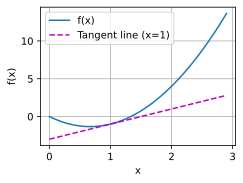

In [85]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

### 练习

In [87]:
# y = f(x) = x^3 - 1/ x 和其在x=1处切线的图像
def f(x):
    return x ** 3 - 1 / x

def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

In [89]:
h = 0.1 
for i in range(5):
    print(f'h={h:.5f}, numerival limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerival limit=4.21909
h=0.01000, numerival limit=4.02020
h=0.00100, numerival limit=4.00200
h=0.00010, numerival limit=4.00020
h=0.00001, numerival limit=4.00002


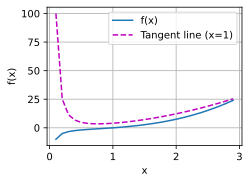

In [94]:
x = torch.arange(0.1, 3, 0.1) # 避免0作为除数
plot(x, [f(x), 3*x**2 + 1/x**2], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9])

## 自动微分

In [107]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [108]:
x.requires_grad_(True) # 等价于x = torch.arange(4.0, requires_grad=True)
x.grad #默认为NOne

In [109]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [110]:
x.shape

torch.Size([4])

In [111]:
x1 = torch.ones(3, 4)
x2 = torch.ones(3, 4).T
torch.mm(x1, x2)

tensor([[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]])

In [112]:
y.backward() # 对y进行反向传播
x.grad # y 关于 x 的梯度

tensor([ 0.,  4.,  8., 12.])

In [113]:
x.grad == 4 * x

tensor([True, True, True, True])

In [114]:
# 默认情况下，pytorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [115]:
# 非标量调用backward需要传入gradient参数，该参数指定微分函数关于self的梯度
# 只想求偏导数的和，传递一个1的梯度是合适的
x.grad.zero_()
y = x * x 
y.sum().backward() # 等价于 y.backward(torch.ones(len(x)))
x.grad

tensor([0., 2., 4., 6.])

In [125]:
x.grad.zero_()
y = x * x
y.backward(torch.ones(len(x)))
x.grad

tensor([0., 2., 4., 6.])

### 分离计算

In [130]:
x.grad.zero_()
y = x * x
u = y.detach() # 返回一个新的张量，在当前计算图中分离，不会计算梯度
z = u * x

z.sum().backward() # 如果结果为标量可以直接反向传播
x.grad, u

(tensor([0., 1., 4., 9.]), tensor([0., 1., 4., 9.]))

In [131]:
x.grad.zero_()
y.sum().backward() # 因为记录了y的计算结果，可以在y上调用反向传播
x.grad == 2 * x

tensor([True, True, True, True])

In [129]:
x.grad.zero_()
y = x * x
u = y.detach() # 返回一个新的张量，在当前计算图中分离，不会计算梯度
z = u * x

z.backward(torch.arange(len(x))) # 如果结果不为标量，反向传播中的参数个数需要与求导数值对应，把不同的对应值代表不同的权重
x.grad, u

(tensor([ 0.,  1.,  8., 27.]), tensor([0., 1., 4., 9.]))

### 控制流的梯度计算

In [153]:
def f(a): # 分析此函数，其运算是一个线性运算c = 梯度 * a，对应的剃度可表示为d/a
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [159]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()
# d.backward() 不支持再次运行反向传播函数
a

tensor(0.2342, requires_grad=True)

In [160]:
a.grad, a.grad == d / a

(tensor(8192.), tensor(True))

In [173]:
def f(x):
    return torch.sin(x)

In [179]:
x3 = torch.arange(0.1, 10, 0.05)
x3.requires_grad_(True)
y3 = f(x3)
y3.sum().backward()
x3.grad

tensor([ 0.9950,  0.9888,  0.9801,  0.9689,  0.9553,  0.9394,  0.9211,  0.9004,
         0.8776,  0.8525,  0.8253,  0.7961,  0.7648,  0.7317,  0.6967,  0.6600,
         0.6216,  0.5817,  0.5403,  0.4976,  0.4536,  0.4085,  0.3624,  0.3153,
         0.2675,  0.2190,  0.1700,  0.1205,  0.0707,  0.0208, -0.0292, -0.0791,
        -0.1288, -0.1782, -0.2272, -0.2756, -0.3233, -0.3702, -0.4161, -0.4611,
        -0.5048, -0.5474, -0.5885, -0.6282, -0.6663, -0.7027, -0.7374, -0.7702,
        -0.8011, -0.8301, -0.8569, -0.8816, -0.9041, -0.9243, -0.9422, -0.9578,
        -0.9710, -0.9817, -0.9900, -0.9958, -0.9991, -1.0000, -0.9983, -0.9941,
        -0.9875, -0.9784, -0.9668, -0.9528, -0.9365, -0.9178, -0.8968, -0.8735,
        -0.8481, -0.8206, -0.7910, -0.7594, -0.7259, -0.6907, -0.6536, -0.6150,
        -0.5748, -0.5332, -0.4903, -0.4461, -0.4008, -0.3545, -0.3073, -0.2594,
        -0.2108, -0.1617, -0.1122, -0.0623, -0.0124,  0.0376,  0.0875,  0.1372,
         0.1865,  0.2354,  0.2837,  0.33

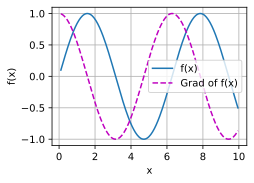

In [183]:
plot(x3.detach(), [f(x3).detach(), x3.grad.detach()], 'x', 'f(x)', legend=['f(x)', 'Grad of f(x)'])

## 概率

In [184]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [185]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

In [187]:
multinomial.Multinomial(10, fair_probs).sample() # 输出的概率相等，共有6种情况

tensor([0., 4., 0., 0., 2., 4.])

In [188]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1740, 0.1750, 0.1860, 0.1510, 0.1550, 0.1590])

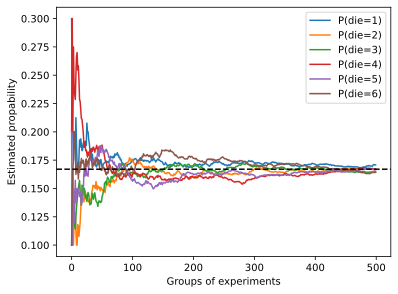

In [194]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,)) #每次取样10次，结果类别为6， 采样次数为500次
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True) #计算不同结果出现的概率

d2l.set_figsize((6, 4.5))
for i in range(6):
        d2l.plt.plot(estimates[:, i].numpy(), # 列表下表作为x轴坐标，随次数增大逐渐收敛
                    label=("P(die=" + str(i+1)+ ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated propability')
d2l.plt.legend()

## 查阅文档

In [195]:
dir(torch.distributions)

['AbsTransform',
 'AffineTransform',
 'Bernoulli',
 'Beta',
 'Binomial',
 'CatTransform',
 'Categorical',
 'Cauchy',
 'Chi2',
 'ComposeTransform',
 'ContinuousBernoulli',
 'CorrCholeskyTransform',
 'CumulativeDistributionTransform',
 'Dirichlet',
 'Distribution',
 'ExpTransform',
 'Exponential',
 'ExponentialFamily',
 'FisherSnedecor',
 'Gamma',
 'Geometric',
 'Gumbel',
 'HalfCauchy',
 'HalfNormal',
 'Independent',
 'IndependentTransform',
 'Kumaraswamy',
 'LKJCholesky',
 'Laplace',
 'LogNormal',
 'LogisticNormal',
 'LowRankMultivariateNormal',
 'LowerCholeskyTransform',
 'MixtureSameFamily',
 'Multinomial',
 'MultivariateNormal',
 'NegativeBinomial',
 'Normal',
 'OneHotCategorical',
 'OneHotCategoricalStraightThrough',
 'Pareto',
 'Poisson',
 'PowerTransform',
 'RelaxedBernoulli',
 'RelaxedOneHotCategorical',
 'ReshapeTransform',
 'SigmoidTransform',
 'SoftmaxTransform',
 'SoftplusTransform',
 'StackTransform',
 'StickBreakingTransform',
 'StudentT',
 'TanhTransform',
 'Transform',
 '

In [196]:
help(torch.tensor)

Help on built-in function tensor in module torch:

tensor(...)
    tensor(data, *, dtype=None, device=None, requires_grad=False, pin_memory=False) -> Tensor
    
    Constructs a tensor with no autograd history (also known as a "leaf tensor", see :doc:`/notes/autograd`) by copying :attr:`data`.
    
    .. warning::
    
        When working with tensors prefer using :func:`torch.Tensor.clone`,
        :func:`torch.Tensor.detach`, and :func:`torch.Tensor.requires_grad_` for
        readability. Letting `t` be a tensor, ``torch.tensor(t)`` is equivalent to
        ``t.clone().detach()``, and ``torch.tensor(t, requires_grad=True)``
        is equivalent to ``t.clone().detach().requires_grad_(True)``.
    
    .. seealso::
    
        :func:`torch.as_tensor` preserves autograd history and avoids copies where possible.
        :func:`torch.from_numpy` creates a tensor that shares storage with a NumPy array.
    
    Args:
        data (array_like): Initial data for the tensor. Can be a li